In [61]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [62]:
data = pd.read_csv("sales_data.csv")
data.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [63]:
data.tail()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
995,1010,2023-04-15,Charlie,North,4733.88,4,Food,4943.03,5442.15,Returning,0.29,Cash,Online,North-Charlie
996,1067,2023-09-07,Bob,North,4716.36,37,Clothing,1754.32,1856.40,New,0.21,Bank Transfer,Retail,North-Bob
997,1018,2023-04-27,David,South,7629.70,17,Clothing,355.72,438.27,Returning,0.06,Bank Transfer,Online,South-David
998,1100,2023-12-20,David,West,1629.47,39,Electronics,3685.03,3743.39,New,0.01,Bank Transfer,Online,West-David
999,1086,2023-08-16,Alice,East,4923.93,48,Food,2632.58,2926.68,Returning,0.14,Cash,Online,East-Alice


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


In [65]:
data.describe()

,Product_ID,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1050.128000,5019.265230,25.355000,2475.304550,2728.440120,0.15239
std,29.573505,2846.790126,14.159006,1417.872546,1419.399839,0.08720
min,1001.000000,100.120000,1.000000,60.280000,167.120000,0.00000
25%,1024.000000,2550.297500,13.000000,1238.380000,1509.085000,0.08000
50%,1051.000000,5019.300000,25.000000,2467.235000,2696.400000,0.15000
75%,1075.000000,7507.445000,38.000000,3702.865000,3957.970000,0.23000
max,1100.000000,9989.040000,49.000000,4995.300000,5442.150000,0.30000


In [ ]:
data['Sale_Date'] = pd.to_datetime(data['Sale_Date'])
data['Year']=data['Sale_Date'].dt.year
data['Month']=data['Sale_Date'].dt.month
data['Day']=data['Sale_Date'].dt.day
data['Weekday']=data['Sale_Date'].dt.dayofweek
print(data.head())

   Product_ID  Sale_Date Sales_Rep Region  Sales_Amount  Quantity_Sold  \
0        1052 2023-02-03       Bob  North       5053.97             18   
1        1093 2023-04-21       Bob   West       4384.02             17   
2        1015 2023-09-21     David  South       4631.23             30   
3        1072 2023-08-24       Bob  South       2167.94             39   
4        1061 2023-03-24   Charlie   East       3750.20             13   

  Product_Category  Unit_Cost  Unit_Price Customer_Type  Discount  \
0        Furniture     152.75      267.22     Returning      0.09   
1        Furniture    3816.39     4209.44     Returning      0.11   
2             Food     261.56      371.40     Returning      0.20   
3         Clothing    4330.03     4467.75           New      0.02   
4      Electronics     637.37      692.71           New      0.08   

  Payment_Method Sales_Channel Region_and_Sales_Rep  Year  Month  Day  Weekday  
0           Cash        Online            North-Bob  2023  

In [67]:
invalid_prices = data[data['Unit_Price']<=data['Unit_Cost']]
print("Number of invalid rows: ", len(invalid_prices))

data[data['Unit_Price'] > data['Unit_Cost']]

Number of invalid rows:  0


,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep,Year,Month,Day,Weekday
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob,2023,2,3,4
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob,2023,4,21,4
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David,2023,9,21,3
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob,2023,8,24,3
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie,2023,3,24,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1010,2023-04-15,Charlie,North,4733.88,4,Food,4943.03,5442.15,Returning,0.29,Cash,Online,North-Charlie,2023,4,15,5
996,1067,2023-09-07,Bob,North,4716.36,37,Clothing,1754.32,1856.40,New,0.21,Bank Transfer,Retail,North-Bob,2023,9,7,3
997,1018,2023-04-27,David,South,7629.70,17,Clothing,355.72,438.27,Returning,0.06,Bank Transfer,Online,South-David,2023,4,27,3
998,1100,2023-12-20,David,West,1629.47,39,Electronics,3685.03,3743.39,New,0.01,Bank Transfer,Online,West-David,2023,12,20,2


In [68]:
data.dropna()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep,Year,Month,Day,Weekday
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob,2023,2,3,4
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob,2023,4,21,4
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David,2023,9,21,3
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob,2023,8,24,3
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie,2023,3,24,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1010,2023-04-15,Charlie,North,4733.88,4,Food,4943.03,5442.15,Returning,0.29,Cash,Online,North-Charlie,2023,4,15,5
996,1067,2023-09-07,Bob,North,4716.36,37,Clothing,1754.32,1856.40,New,0.21,Bank Transfer,Retail,North-Bob,2023,9,7,3
997,1018,2023-04-27,David,South,7629.70,17,Clothing,355.72,438.27,Returning,0.06,Bank Transfer,Online,South-David,2023,4,27,3
998,1100,2023-12-20,David,West,1629.47,39,Electronics,3685.03,3743.39,New,0.01,Bank Transfer,Online,West-David,2023,12,20,2


In [69]:
print(f"Number od duplicated rows: {data.duplicated().sum()}")

Number od duplicated rows: 0


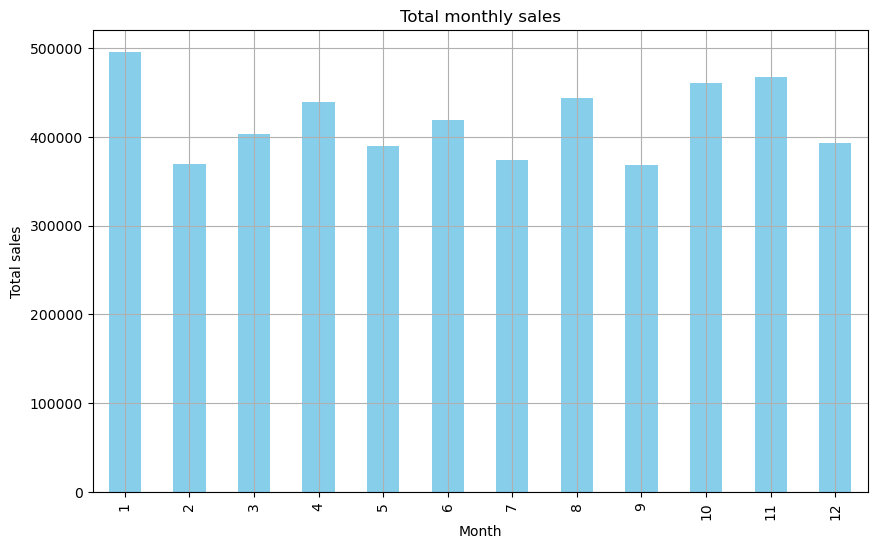

In [70]:
monthly_sales = data.groupby('Month')['Sales_Amount'].sum()
monthly_sales.plot(kind='bar',figsize=(10,6), title = 'Total monthly sales', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total sales')
plt.grid(True)
plt.show()

In [71]:
print(f"Total products sold: {data['Quantity_Sold'].sum()}")
print(f"Total sales amount: {data['Sales_Amount'].sum()}")
print(f"Most frequent payment method: {data['Payment_Method'].value_counts()}")
print(f"Sales by product category: {data['Product_Category'].value_counts()}")


Total products sold: 25355
Total sales amount: 5019265.2299999995
Most frequent payment method: Payment_Method
Credit Card      345
Bank Transfer    342
Cash             313
Name: count, dtype: int64
Sales by product category: Product_Category
Clothing       268
Furniture      260
Electronics    246
Food           226
Name: count, dtype: int64


In [72]:
print(f"Transactions depending on sales channel: {data['Sales_Channel'].value_counts()} ")
print(f"Total sales depending on sales channel: {data.groupby('Sales_Channel')['Sales_Amount'].sum()}")

Transactions depending on sales channel: Sales_Channel
Retail    512
Online    488
Name: count, dtype: int64 
Total sales depending on sales channel: Sales_Channel
Online    2458833.93
Retail    2560431.30
Name: Sales_Amount, dtype: float64


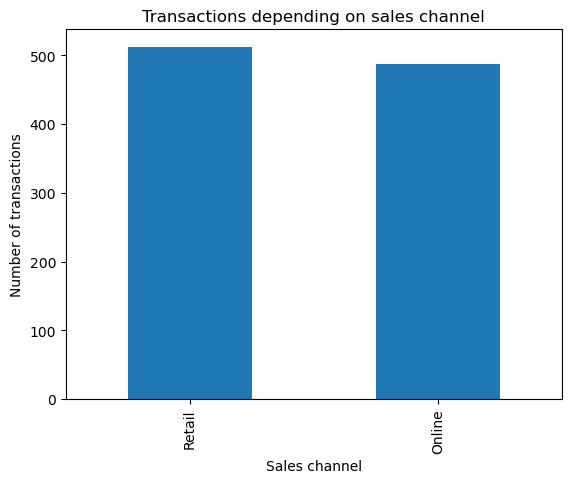

In [73]:
data['Sales_Channel'].value_counts().plot(kind='bar',title='Transactions depending on sales channel')
plt.ylabel('Number of transactions')
plt.xlabel('Sales channel')
plt.show()

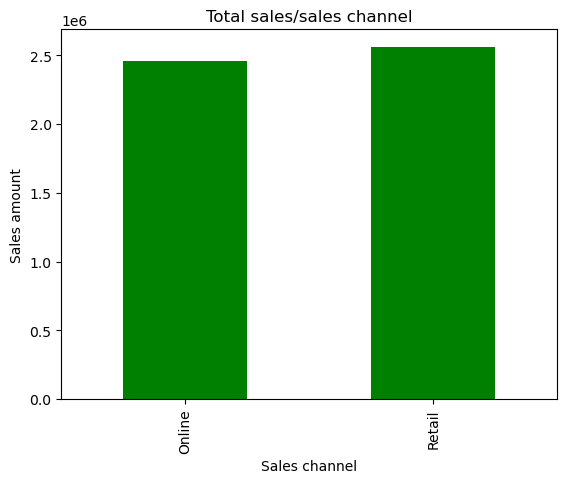

In [74]:
data.groupby('Sales_Channel')['Sales_Amount'].sum().plot(kind='bar',color='green', title='Total sales/sales channel')
plt.ylabel('Sales amount')
plt.xlabel('Sales channel')
plt.show()

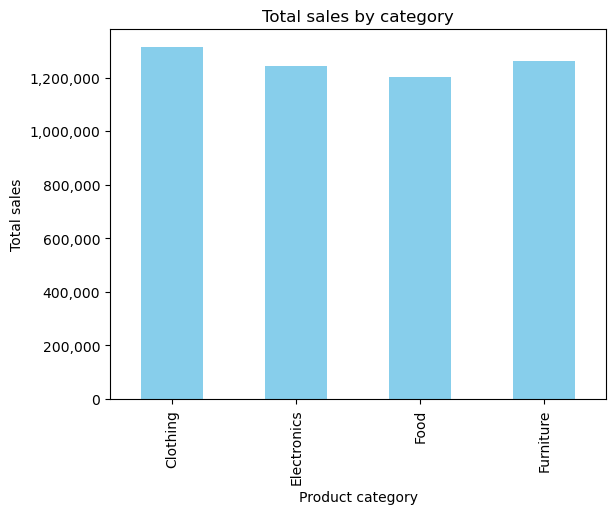

In [75]:
import matplotlib.ticker as mticker
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

data.groupby('Product_Category')['Sales_Amount'].sum().plot(kind='bar', color='skyblue', title='Total sales by category')
plt.ylabel('Total sales')
plt.xlabel('Product category')
plt.show()


Text(0, 0.5, 'Number of transactions')

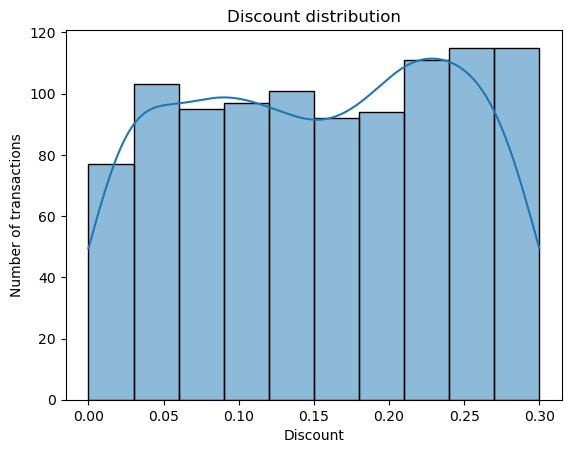

In [76]:
sns.histplot(data['Discount'],bins=10,kde=True)
plt.title('Discount distribution')
plt.xlabel('Discount')
plt.ylabel('Number of transactions')

In [77]:
df=data[data['Sales_Channel']=='Online']
df.head(20)

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep,Year,Month,Day,Weekday
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob,2023,2,3,4
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie,2023,3,24,4
5,1021,2023-02-11,Charlie,West,3761.15,32,Food,900.79,1106.51,New,0.21,Cash,Online,West-Charlie,2023,2,11,5
6,1083,2023-04-11,Bob,West,618.31,29,Furniture,2408.81,2624.09,Returning,0.14,Cash,Online,West-Bob,2023,4,11,1
7,1087,2023-01-06,Eve,South,7698.92,46,Furniture,3702.51,3964.65,New,0.12,Bank Transfer,Online,South-Eve,2023,1,6,4
8,1075,2023-06-29,David,South,4223.39,30,Furniture,738.06,1095.45,New,0.05,Bank Transfer,Online,South-David,2023,6,29,3
9,1075,2023-10-09,Charlie,West,8239.58,18,Clothing,2228.35,2682.34,New,0.13,Bank Transfer,Online,West-Charlie,2023,10,9,0
11,1100,2023-08-14,Bob,West,2198.74,43,Food,1100.81,1137.44,Returning,0.08,Bank Transfer,Online,West-Bob,2023,8,14,0
13,1003,2023-12-31,Alice,South,4775.59,30,Furniture,4190.28,4270.65,New,0.20,Cash,Online,South-Alice,2023,12,31,6
16,1002,2023-05-30,David,North,6810.35,17,Furniture,4024.76,4420.15,Returning,0.04,Cash,Online,North-David,2023,5,30,1


In [78]:
df.sample(n=7, random_state=40)


,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep,Year,Month,Day,Weekday
849,1094,2023-02-15,Charlie,South,8643.67,47,Food,3450.36,3557.38,New,0.20,Credit Card,Online,South-Charlie,2023,2,15,2
941,1073,2023-05-07,David,North,1347.42,29,Clothing,2152.68,2475.93,Returning,0.22,Bank Transfer,Online,North-David,2023,5,7,6
261,1036,2023-07-01,Alice,West,3111.57,17,Furniture,1475.00,1840.77,Returning,0.10,Credit Card,Online,West-Alice,2023,7,1,5
773,1092,2023-07-11,Eve,East,7667.10,33,Electronics,2595.42,3083.06,New,0.08,Credit Card,Online,East-Eve,2023,7,11,1
933,1090,2023-04-21,David,West,4883.49,35,Electronics,1130.60,1466.18,Returning,0.13,Cash,Online,West-David,2023,4,21,4
69,1036,2023-10-20,David,North,6499.94,49,Clothing,1247.10,1429.44,New,0.16,Cash,Online,North-David,2023,10,20,4
750,1076,2023-01-17,Charlie,South,8464.23,16,Clothing,1964.15,2211.17,Returning,0.21,Bank Transfer,Online,South-Charlie,2023,1,17,1


In [79]:
#utjecaj popusta na prodaju
df[['Discount','Sales_Amount']].corr()

,Discount,Sales_Amount
Discount,1.000000,-0.013628
Sales_Amount,-0.013628,1.000000


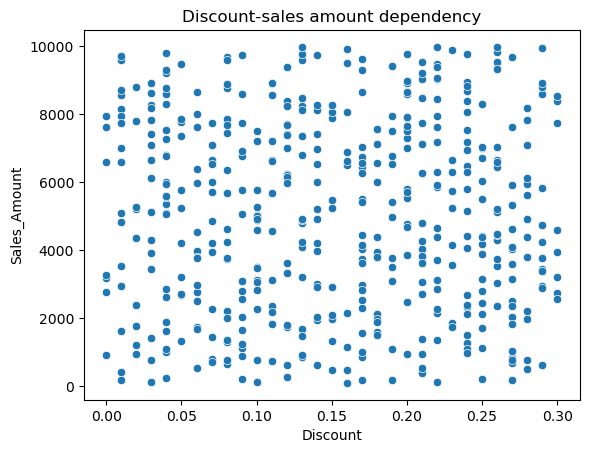

In [80]:
sns.scatterplot(data=df, x='Discount', y='Sales_Amount')
plt.title('Discount-sales amount dependency')
plt.show()

In [81]:
df[['Discount', 'Quantity_Sold']].corr()


,Discount,Quantity_Sold
Discount,1.000000,-0.025688
Quantity_Sold,-0.025688,1.000000


In [82]:
#discount by product category
df.groupby('Product_Category')[['Discount', 'Quantity_Sold']].corr().unstack().loc[:, 'Quantity_Sold']


,Discount,Quantity_Sold
Product_Category,,
Clothing,-0.123354,1.0
Electronics,-0.022950,1.0
Food,-0.101857,1.0
Furniture,0.114176,1.0


<Axes: xlabel='Product_Category'>

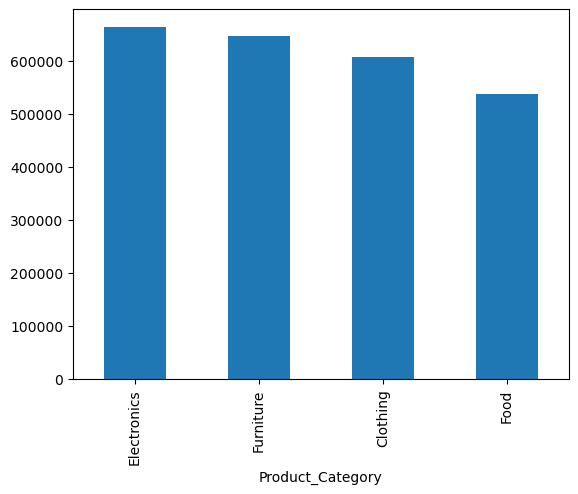

In [83]:
#which product sells the most
df.groupby('Product_Category')['Sales_Amount'].sum().sort_values(ascending=False).plot(kind='bar')

In [84]:
customer_count = df['Customer_Type'].value_counts()
print(customer_count)
customer_sales = df.groupby('Customer_Type')['Sales_Amount'].sum()
print(customer_sales)
#df.groupby('Customer_Type')['Sales_Amount'].mean().plot(kind='bar')


Customer_Type
New          254
Returning    234
Name: count, dtype: int64
Customer_Type
New          1282624.01
Returning    1176209.92
Name: Sales_Amount, dtype: float64


In [85]:
customer_stats = df.groupby('Customer_Type').agg({
    'Sales_Amount':'sum',
    'Quantity_Sold':'sum',
    'Product_ID':'nunique'
})
print(customer_stats)

               Sales_Amount  Quantity_Sold  Product_ID
Customer_Type                                         
New              1282624.01           6788          93
Returning        1176209.92           5814          93


In [86]:
customer_quantity=df.groupby('Customer_Type')['Quantity_Sold'].sum()
print(customer_quantity)

Customer_Type
New          6788
Returning    5814
Name: Quantity_Sold, dtype: int64


In [87]:
customer_count=df.groupby('Customer_Type')['Product_ID'].nunique()
avg_sales_per_customer=customer_sales/customer_count
print(avg_sales_per_customer)

Customer_Type
New          13791.656022
Returning    12647.418495
dtype: float64


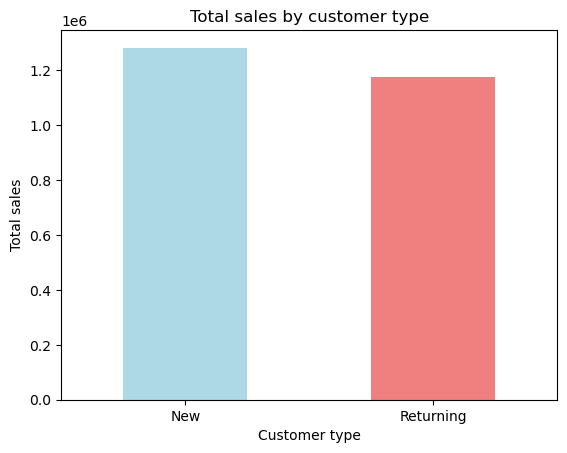

In [88]:
import matplotlib.pyplot as plt

customer_sales.plot(kind='bar',color=['lightblue','lightcoral'])
plt.title('Total sales by customer type')
plt.ylabel('Total sales')
plt.xlabel('Customer type')
plt.xticks(rotation=0)
plt.show()

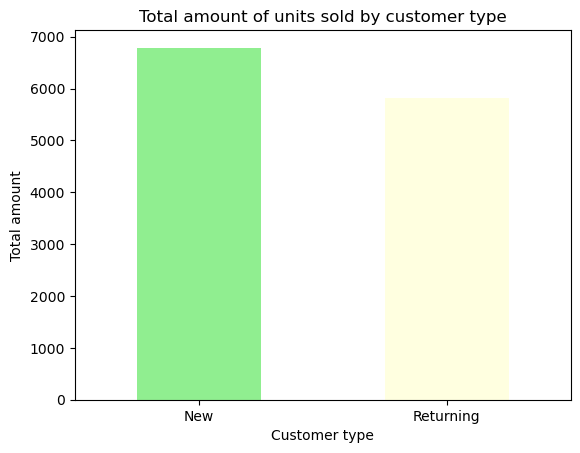

In [89]:
customer_quantity.plot(kind='bar',color=['lightgreen','lightyellow'])
plt.title('Total amount of units sold by customer type')
plt.xlabel('Customer type')
plt.ylabel('Total amount')
plt.xticks(rotation=0)
plt.show()

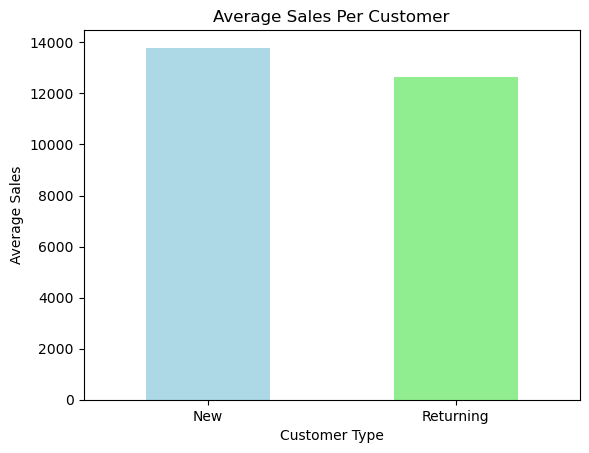

In [90]:
avg_sales_per_customer.plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title('Average Sales Per Customer')
plt.xlabel('Customer Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='Region'>

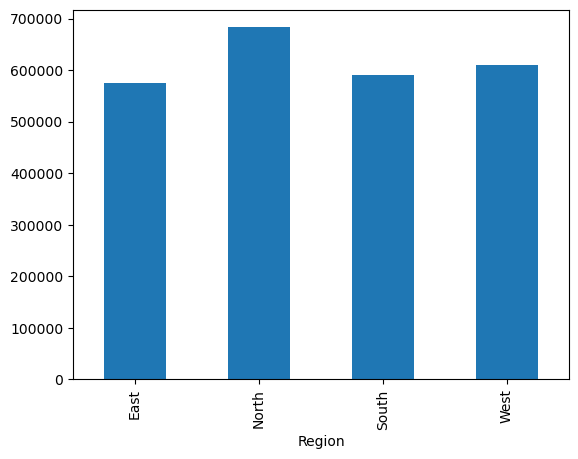

In [91]:
df.groupby('Region')['Sales_Amount'].sum().plot(kind='bar')


<Axes: xlabel='Sales_Rep'>

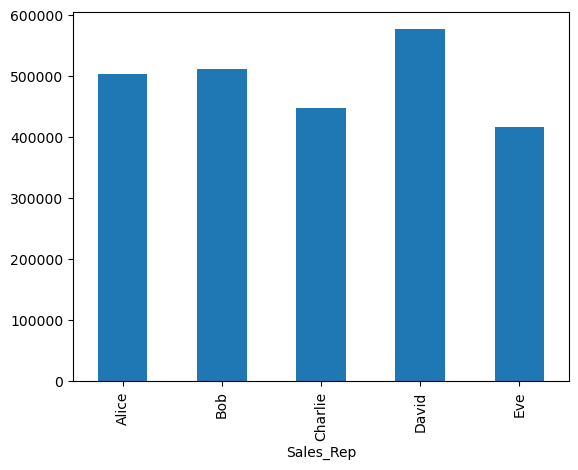

In [92]:
df.groupby('Sales_Rep')['Sales_Amount'].sum().plot(kind='bar')

<Axes: xlabel='Month'>

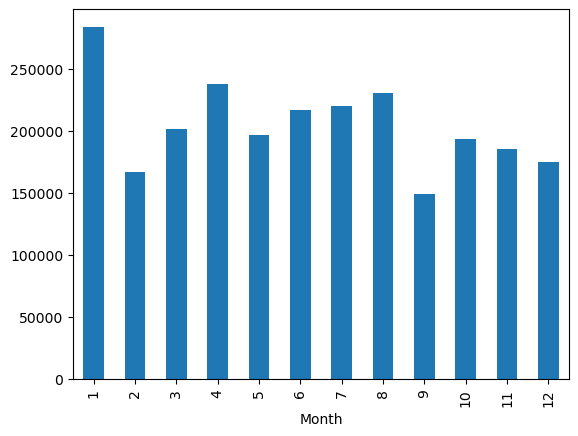

In [93]:
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])
df['Month'] = df['Sale_Date'].dt.month
df['DayOfWeek'] = df['Sale_Date'].dt.dayofweek
df.groupby('Month')['Sales_Amount'].sum().plot(kind='bar')


<Axes: xlabel='DayOfWeek'>

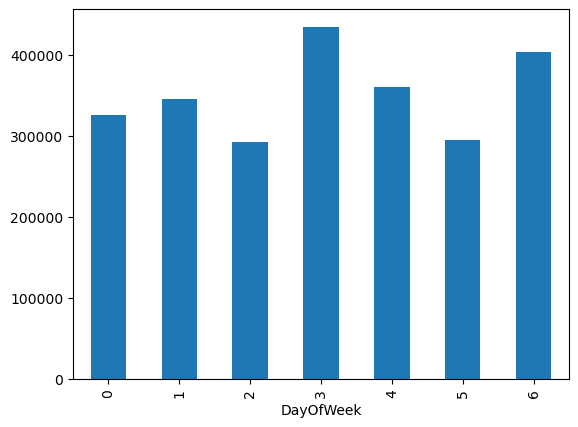

In [94]:
df.groupby('DayOfWeek')['Sales_Amount'].sum().plot(kind='bar')


In [95]:
df.groupby('Month')['Sales_Amount'].sum()

Month
1     284098.03
2     166700.56
3     201709.57
4     238340.93
5     196668.60
6     216954.98
7     220109.20
8     230453.32
9     149554.14
10    193294.93
11    185501.82
12    175447.85
Name: Sales_Amount, dtype: float64

In [96]:
print(f"Number of transactions depending on Payment method:\n", df['Payment_Method'].value_counts())
print("\nTotal sales amount depending on payment method:")
df.groupby('Payment_Method')['Sales_Amount'].sum()


Number of transactions depending on Payment method:
 Payment_Method
Bank Transfer    174
Credit Card      163
Cash             151
Name: count, dtype: int64

Total sales amount depending on payment method:


Payment_Method
Bank Transfer    916202.76
Cash             737410.01
Credit Card      805221.16
Name: Sales_Amount, dtype: float64

In [97]:
print(f"AVERAGE SALES AMOUNT depending on payment method: ", df.groupby('Payment_Method')['Sales_Amount'].mean())

AVERAGE SALES AMOUNT depending on payment method:  Payment_Method
Bank Transfer    5265.533103
Cash             4883.510000
Credit Card      4940.007117
Name: Sales_Amount, dtype: float64


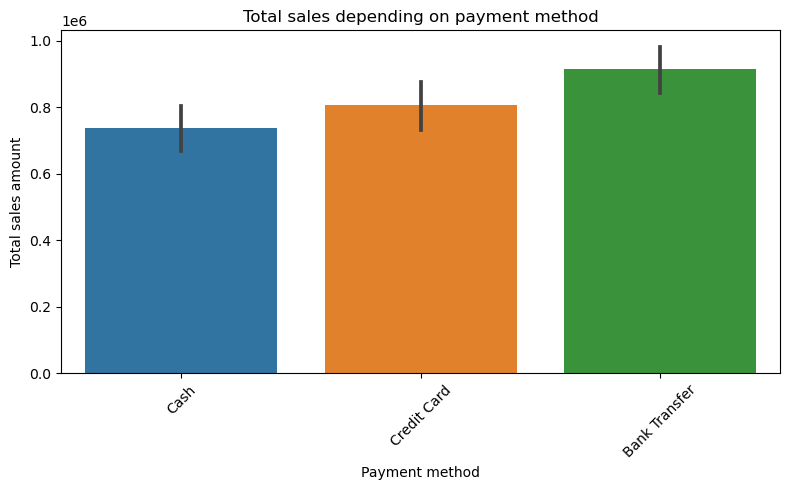

In [98]:


plt.figure(figsize=(8,5))
sns.barplot(x='Payment_Method',y='Sales_Amount',data=df,estimator=sum)
plt.title("Total sales depending on payment method")
plt.xlabel("Payment method")
plt.ylabel("Total sales amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

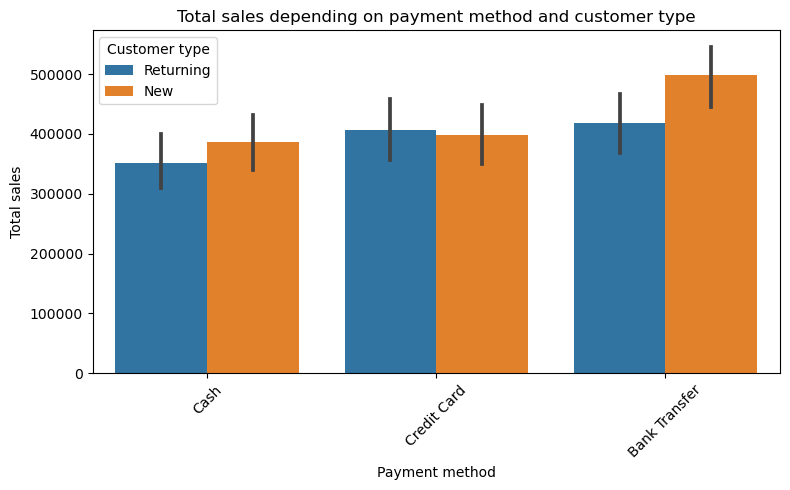

In [99]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='Payment_Method',y='Sales_Amount',hue='Customer_Type',estimator=sum)
plt.title("Total sales depending on payment method and customer type")
plt.xlabel("Payment method")
plt.ylabel("Total sales")
plt.xticks(rotation=45)
plt.legend(title="Customer type")
plt.tight_layout()
plt.show()

In [100]:
print(f"Maximum discount in %: ", df['Discount'].max())

Maximum discount in %:  0.3


In [101]:
#biggest sale for the maximum discount
max_discount=df['Discount'].max()
print(df[df['Discount']==max_discount][['Sales_Amount','Customer_Type','Product_Category']])

     Sales_Amount Customer_Type Product_Category
33        2749.17           New        Furniture
52        7751.92     Returning        Furniture
504       2559.00           New      Electronics
645       3955.11     Returning         Clothing
701       3206.89           New         Clothing
819       4606.20           New      Electronics
821       8389.93     Returning        Furniture
867       8540.22     Returning             Food


In [102]:
#average discount depending on customer type
print(f"Average discount depending on customer type:\n",df.groupby('Customer_Type')['Discount'].mean())

Average discount depending on customer type:
 Customer_Type
New          0.150827
Returning    0.154444
Name: Discount, dtype: float64


In [103]:
#average sales affected by discount amount
def discount_level(x):
    if x<0.10:
        return 'Low'
    elif x<0.20:
        return 'Medium'
    else:
        return 'High'
    
df['Discount_Level']=df['Discount'].apply(discount_level)
print(df.groupby('Discount_Level')['Sales_Amount'].mean())

Discount_Level
High      5163.146033
Low       5023.089667
Medium    4904.880584
Name: Sales_Amount, dtype: float64


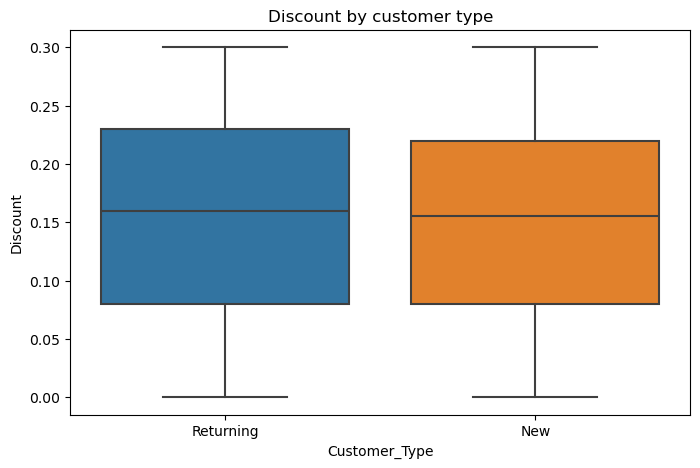

In [104]:
#discount vs customer type
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x='Customer_Type',y='Discount')
plt.title("Discount by customer type")
plt.tight_layout
plt.show()

In [148]:
from scipy.stats import ttest_ind

new = df[df['Customer_Type'] == 'New']['Discount']
ret = df[df['Customer_Type'] == 'Returning']['Discount']

t_stat, p_value = ttest_ind(new, ret)
print(f"T-test p-value: {p_value:.4f}")

T-test p-value: 0.6427


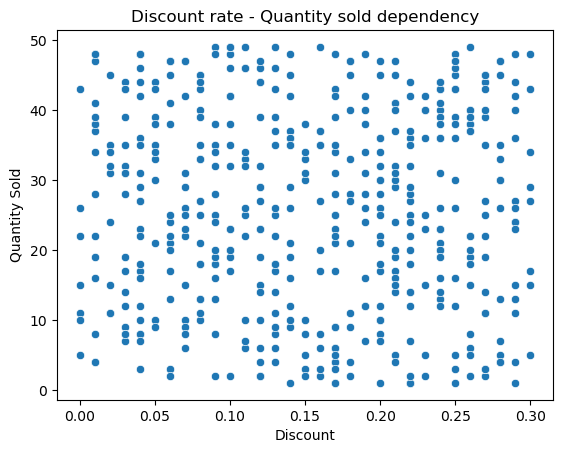

In [149]:
#discount rate - quantity sold dependency
sns.scatterplot(x='Discount', y='Quantity_Sold', data=df)
plt.title('Discount rate - Quantity sold dependency')
plt.xlabel('Discount')
plt.ylabel('Quantity Sold')
plt.show()

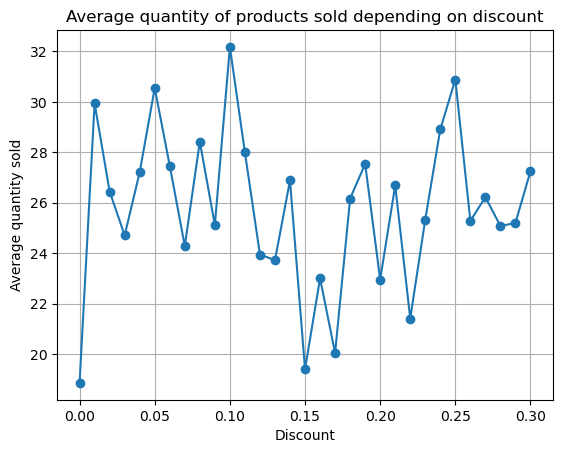

In [150]:
# average quantity of products sold
df.groupby('Discount')['Quantity_Sold'].mean().plot(kind='line', marker='o')
plt.title('Average quantity of products sold depending on discount')
plt.xlabel('Discount')
plt.ylabel('Average quantity sold')
plt.grid(True)
plt.show()


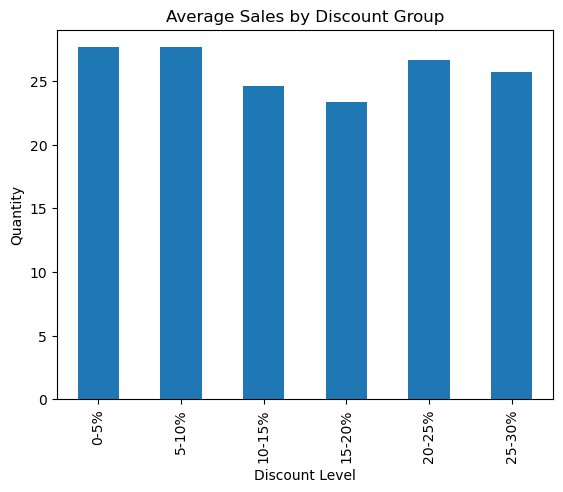

In [151]:
df['Discount_Group'] = pd.cut(df['Discount'], bins=[0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 
                                 labels=['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25-30%'])

df.groupby('Discount_Group')['Quantity_Sold'].mean().plot(kind='bar')
plt.title('Average Sales by Discount Group')
plt.ylabel('Quantity')
plt.xlabel('Discount Level')
plt.show()

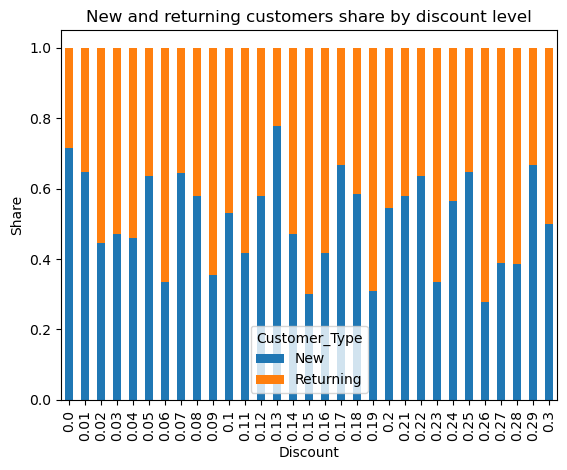

In [152]:
#discount by customer type
df.groupby('Discount')['Customer_Type'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title('New and returning customers share by discount level')
plt.ylabel('Share')
plt.show()

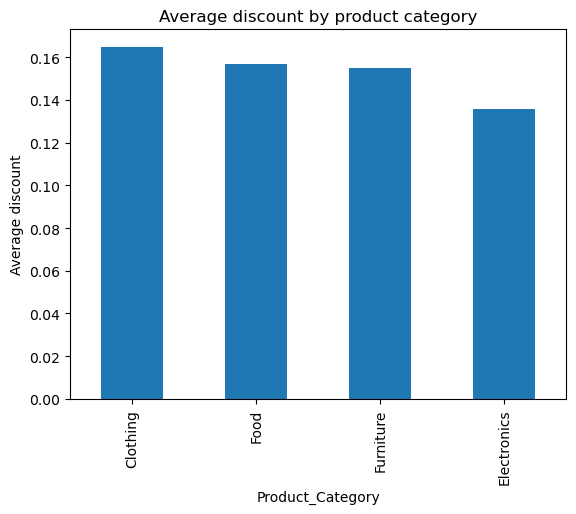

In [153]:
df.groupby('Product_Category')['Discount'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average discount by product category')
plt.ylabel('Average discount')
plt.show()

               Discount  Sales_Amount  Quantity_Sold
Discount       1.000000     -0.013628      -0.025688
Sales_Amount  -0.013628      1.000000      -0.045854
Quantity_Sold -0.025688     -0.045854       1.000000


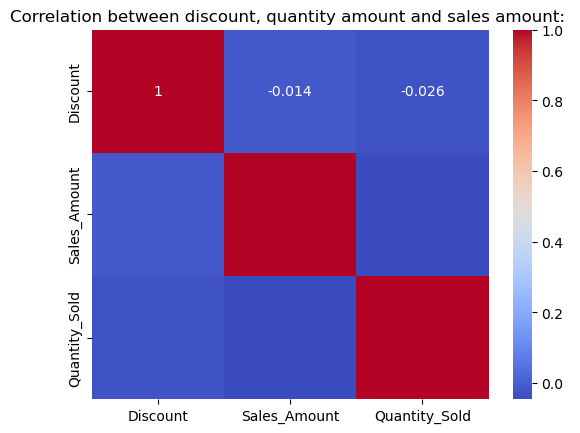

In [154]:
corr = df[['Discount', 'Sales_Amount', 'Quantity_Sold']].corr()
print(corr)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between discount, quantity amount and sales amount: ')
plt.show()


In [156]:
# Grouping and calculating correlation by categories
categories = df['Product_Category'].unique()

for category in categories:
    subset = df[df['Product_Category'] == category]
    correlation = subset['Discount'].corr(subset['Quantity_Sold'])
    print(f"Correlation Discount-Category for {category}: {correlation:.4f}")


Correlation Discount-Category for Furniture: 0.1142
Correlation Discount-Category for Electronics: -0.0229
Correlation Discount-Category for Food: -0.1019
Correlation Discount-Category for Clothing: -0.1234


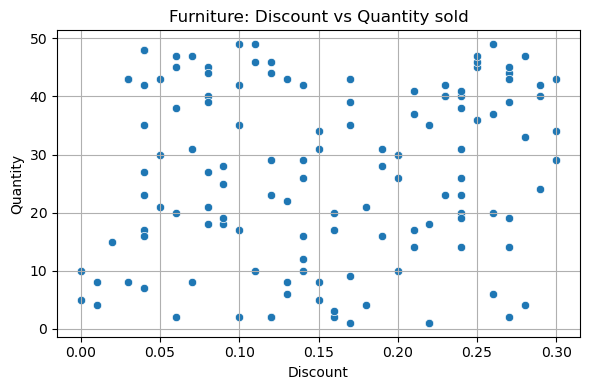

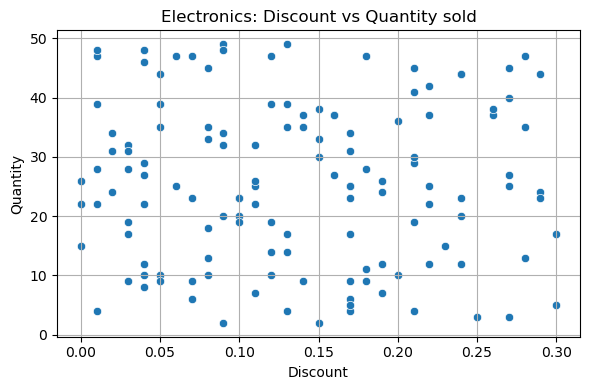

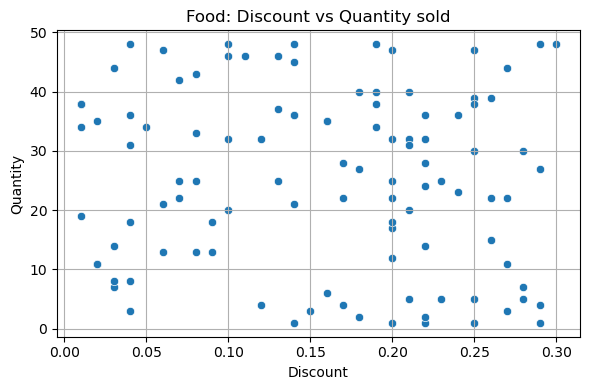

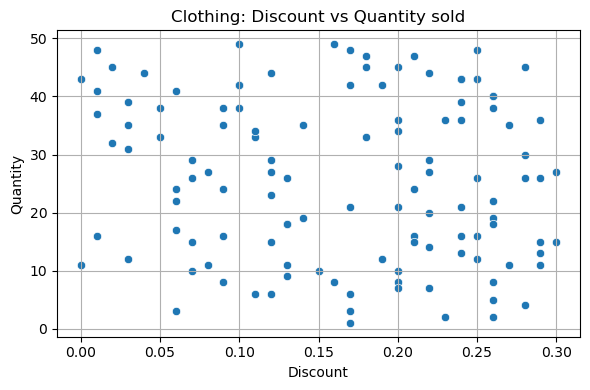

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

for category in categories:
    subset = df[df['Product_Category'] == category]
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=subset, x='Discount', y='Quantity_Sold')
    plt.title(f'{category}: Discount vs Quantity sold')
    plt.xlabel('Discount')
    plt.ylabel('Quantity')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [158]:
for category in categories:
    subset = df[df['Product_Category'] == category]
    corr_matrix = subset[['Discount', 'Quantity_Sold', 'Sales_Amount']].corr()
    print(f"\nCorrelation matrix for {category}:\n{corr_matrix}")



Correlation matrix for Furniture:
               Discount  Quantity_Sold  Sales_Amount
Discount       1.000000       0.114176      0.043888
Quantity_Sold  0.114176       1.000000     -0.137995
Sales_Amount   0.043888      -0.137995      1.000000

Correlation matrix for Electronics:
               Discount  Quantity_Sold  Sales_Amount
Discount       1.000000      -0.022950     -0.059205
Quantity_Sold -0.022950       1.000000     -0.054769
Sales_Amount  -0.059205      -0.054769      1.000000

Correlation matrix for Food:
               Discount  Quantity_Sold  Sales_Amount
Discount       1.000000      -0.101857     -0.000719
Quantity_Sold -0.101857       1.000000     -0.090111
Sales_Amount  -0.000719      -0.090111      1.000000

Correlation matrix for Clothing:
               Discount  Quantity_Sold  Sales_Amount
Discount       1.000000      -0.123354     -0.038349
Quantity_Sold -0.123354       1.000000      0.117207
Sales_Amount  -0.038349       0.117207      1.000000


In [159]:
#correlation between a sales rep and the sales amount
#mean: average sales per transaction
#sum: total sales per seller
#count: number of transactions

df.groupby('Sales_Rep')['Sales_Amount'].agg(['mean', 'sum', 'count']).sort_values(by='mean', ascending=False)


,mean,sum,count
Sales_Rep,,,
David,5441.493396,576798.30,106
Alice,5253.501563,504336.15,96
Charlie,5087.673636,447715.28,88
Bob,4883.832571,512802.42,105
Eve,4485.825591,417181.78,93


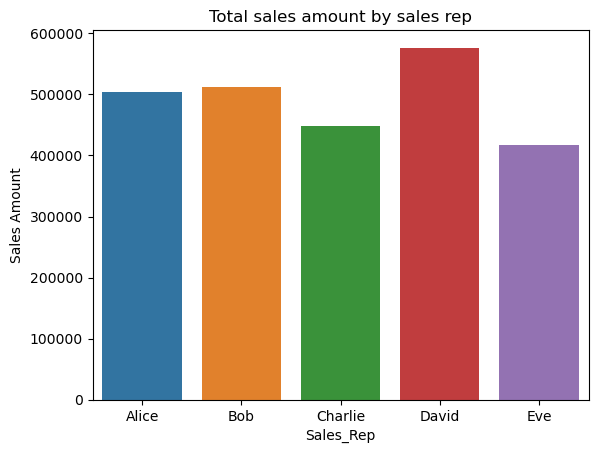

In [162]:
sales_by_rep = df.groupby('Sales_Rep')['Sales_Amount'].sum().reset_index()
sns.barplot(data=sales_by_rep, x='Sales_Rep', y='Sales_Amount')
plt.title('Total sales amount by sales rep')
plt.ylabel('Sales Amount')
plt.show()

In [147]:
encoded = pd.get_dummies(df['Sales_Rep'])
encoded['Sales_Amount'] = df['Sales_Amount']
encoded.corr()['Sales_Amount'].sort_values(ascending=False)


Sales_Amount    1.000000
David           0.076108
Alice           0.038138
Charlie         0.008255
Bob            -0.029058
Eve            -0.096183
Name: Sales_Amount, dtype: float64

In [146]:
#discounts by region
discount_by_region=df.groupby('Region')['Discount'].mean() *100
print(discount_by_region)

Region
East     16.140496
North    15.238462
South    15.187500
West     14.480000
Name: Discount, dtype: float64


In [145]:
top_products=df['Product_ID'].value_counts().head(10)
top_product_info = df[df['Product_ID'].isin(top_products.index)]
result = top_product_info.groupby(['Product_ID','Product_Category']).size().reset_index(name='Total_Sold')
result = result.sort_values(by='Total_Sold',ascending=False)
print(result)

    Product_ID Product_Category  Total_Sold
24        1062      Electronics           6
11        1033         Clothing           5
27        1086      Electronics           4
4         1017      Electronics           4
6         1017        Furniture           4
7         1019         Clothing           4
30        1090         Clothing           4
13        1033             Food           3
1         1001      Electronics           3
28        1086             Food           3
16        1049      Electronics           3
29        1086        Furniture           3
22        1051        Furniture           3
32        1090        Furniture           3
9         1019             Food           3
33        1092         Clothing           3
2         1001             Food           3
31        1090      Electronics           2
23        1062         Clothing           2
34        1092      Electronics           2
35        1092             Food           2
25        1062             Food 

In [144]:
top_products=df['Product_ID'].value_counts().head(10).index
print(top_products)

Index([1062, 1086, 1033, 1019, 1017, 1051, 1090, 1092, 1049, 1001], dtype='int64', name='Product_ID')


In [141]:
top_products_info = df[df['Product_ID'].isin(top_products)]
categories = (
    top_products_info.groupby('Product_ID')['Product_Category']
    .agg(lambda x: x.value_counts().index[0])  
)
print(top_products_info)


     Product_ID  Sale_Date Sales_Rep Region  Sales_Amount  Quantity_Sold  \
33         1092 2023-02-09     David   West       2749.17             34   
37         1062 2023-01-06       Eve   East       3439.72             15   
40         1062 2023-03-16     David   West       4195.06             45   
52         1089 2023-10-27     David  North       7751.92             43   
93         1062 2023-11-01       Bob   East       3720.24             36   
..          ...        ...       ...    ...           ...            ...   
962        1090 2023-10-15   Charlie  South       9702.27             48   
980        1089 2023-11-28     David   West       8719.62              8   
985        1017 2023-01-24       Eve  North       4637.40             27   
987        1090 2023-01-04       Eve  North       1028.39             14   
999        1086 2023-08-16     Alice   East       4923.93             48   

    Product_Category  Unit_Cost  Unit_Price Customer_Type  Discount  \
33         Furni

In [143]:
sales_counts = df['Product_ID'].value_counts().head(10).rename('Total_Sold')
result = pd.concat([sales_counts, categories], axis=1).reset_index()
result.columns = ['Product_ID', 'Total_Sold', 'Product_Category']
print(result)


    Product_ID  Total_Sold Product_Category
0         1062        11.0      Electronics
1         1086        10.0      Electronics
2         1033        10.0         Clothing
3         1019        10.0              NaN
4         1017        10.0        Furniture
5         1051         9.0              NaN
6         1090         9.0         Clothing
7         1092         9.0         Clothing
8         1049         8.0              NaN
9         1001         8.0      Electronics
10        1058         NaN        Furniture
11        1089         NaN        Furniture
12        1099         NaN             Food


In [167]:
#Ukupna prodaja po proizvodu
product_sales = df.groupby('Product_ID')['Quantity_Sold'].sum().reset_index()
product_sales.rename(columns={'Quantity_Sold': 'Total_Sold'}, inplace=True)
#Dodavanje najčešće kategorije po proizvodu
category_map = (
    data.groupby('Product_ID')['Product_Category']
    .agg(lambda x: x.value_counts().index[0])
)
product_sales['Product_Category'] = product_sales['Product_ID'].map(category_map)
# Provjera i popunjavanje NaN ako je ostalo nešto
product_sales['Product_Category'] = product_sales['Product_Category'].fillna('Unknown')
# Sortiranje po Total_Sold
product_sales = product_sales.sort_values(by='Total_Sold', ascending=False)
#  Prikaz
print(product_sales.head(15))

    Product_ID  Total_Sold Product_Category
61        1062         325      Electronics
89        1090         318         Clothing
66        1067         268             Food
74        1075         259        Furniture
7         1008         252         Clothing
18        1019         251         Clothing
98        1099         238             Food
91        1092         236         Clothing
16        1017         235        Furniture
68        1069         228      Electronics
95        1096         223      Electronics
85        1086         222             Food
83        1084         217        Furniture
0         1001         215      Electronics
2         1003         209        Furniture
